In [1]:
from datasets import SOCOFingGender, SOCOFingFingers, SOCOFingSamePerson, SOCOFingHeands
from datasets import QFing, NISTSDB4Gender, NISTSDB4Type, NISTSDB300aFingers, NISTSDB300aSamePerson
import FPMLmodule.utils as utils
import tensorflow as tf

In [2]:
# Global Config
seed=9
imgDim = (224, 224, 3)
imgHeight, imgWidth, imgChannels = imgDim
batchSize = 32

# Dataset configuration
dsConfig = {
    'batchSize': batchSize, 
    'parallelTune': tf.data.AUTOTUNE, 
    'split': [0.7, 0.15, 0.15], 
    'inputDim': imgDim, 
    'seed': seed, 
    'shuffle': True
    }

weightsRN50 = "./weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
weightsMNV2 = "./weights/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5"
weightsENB2 = "./weights/efficientnetb2_notop.h5"
weightsINCEPTIONV3 = "./weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weightsXCEPTION = "./weights/xception_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Training interval
epochsForSearch = 10
epochsForBest = 100

In [3]:
SOCOGender = SOCOFingGender(**dict(dsConfig, sampling=SOCOFingGender.UNDER_SAMPLING))
SOCOSame5stack = SOCOFingSamePerson(**dsConfig, numOfSamplesPerSubject=5)
NIST300asame = NISTSDB300aSamePerson(**dsConfig, numOfSamplesPerSubject=5)
SOCOFingers = SOCOFingFingers(**dsConfig)
QualityFing = QFing(**dsConfig)
SOCOHeands = SOCOFingHeands(**dsConfig)
NISTGender = NISTSDB4Gender(**dsConfig)
NISType = NISTSDB4Type(**dsConfig)
NIST300aFingers = NISTSDB300aFingers(**dsConfig)



nist300aFingersDB = NIST300aFingers.create()
genderDS = SOCOGender.create()
fingersDS = SOCOFingers.create()
heandsDS = SOCOHeands.create()
qfingDS = QualityFing.create()
nistGenderDS = NISTGender.create()
nistTypeDS = NISType.create()
sameDSstack = SOCOSame5stack.create()
nist300asameDB = NIST300asame.create()

Metal device set to: AMD Radeon Pro 5500M

systemMemory: 16.00 GB
maxCacheSize: 1.99 GB



2022-06-12 23:58:58.155155: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-12 23:58:58.156627: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-12 23:58:58.157368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
utils.displayDatasetSplitInformation(nist300aFingersDB, NIST300aFingers.classNames)
utils.displayDsSamples(nist300aFingersDB[0], shape=(5,5), title=NIST300aFingers.name, classNames=NIST300aFingers.classNames)

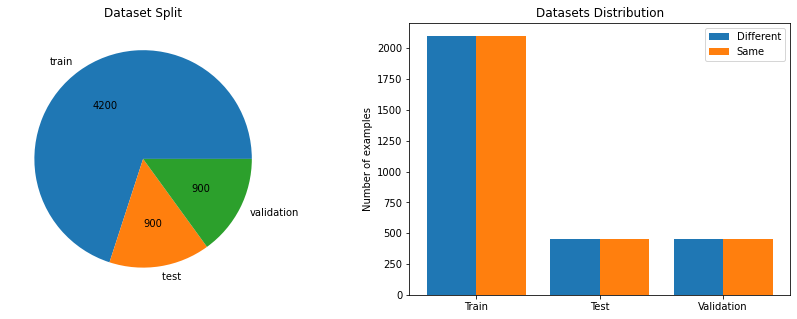

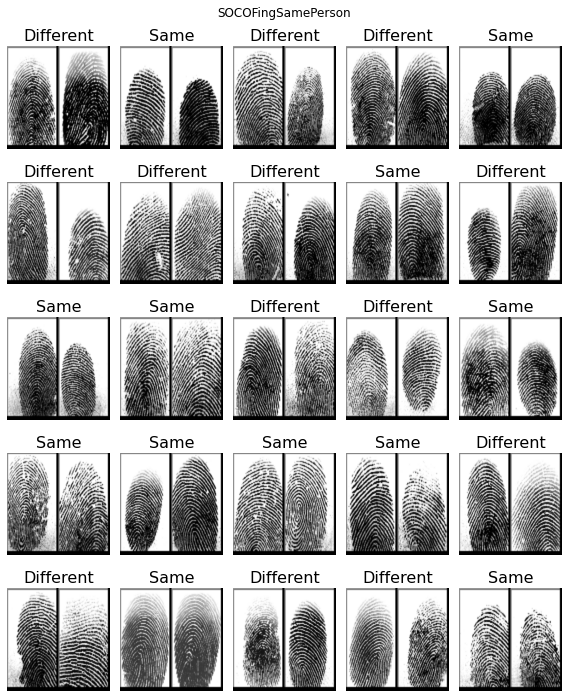

In [5]:
utils.displayDatasetSplitInformation(sameDSstack, SOCOSame5stack.classNames)
utils.displayDsSamples(sameDSstack[0], shape=(5,5), title=SOCOSame5stack.name, classNames=SOCOSame5stack.classNames)